<a href="https://colab.research.google.com/github/Nataliia-Kaguia/goit-ds-hw/blob/main/hw_13_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical


In [ ]:
# 1. Завантаження даних
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()


In [ ]:
# Для економії пам'яті в Colab беремо підмножину даних
x_train, y_train = x_train[:20000], y_train[:20000]
x_test, y_test = x_test[:5000], y_test[:5000]


In [ ]:
# 2. Підготовка даних
# Перетворимо в RGB (3 канали)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
x_train = np.repeat(x_train, 3, axis=-1)
x_test = np.repeat(x_test, 3, axis=-1)


In [ ]:
# Змінимо розмір до 96x96 (щоб менше споживало пам’яті)
x_train = tf.image.resize(x_train, [96, 96]).numpy()
x_test = tf.image.resize(x_test, [96, 96]).numpy()


In [ ]:
# Нормалізація
x_train, x_test = x_train / 255.0, x_test / 255.0


In [ ]:
# One-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [ ]:
# 3. Генератори з аугментацією
datagen = ImageDataGenerator(validation_split=0.2)

train_gen = datagen.flow(x_train, y_train, batch_size=16, subset="training")
val_gen = datagen.flow(x_train, y_train, batch_size=16, subset="validation")


In [ ]:
# 4. Створення моделі з VGG16
base_model = VGG16(
    weights="imagenet",
    include_top=False,
    input_shape=(96, 96, 3)
)


In [ ]:
# Заморожуємо базові шари
for layer in base_model.layers:
    layer.trainable = False

model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# 5. Навчання
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=5
)


Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1820s 2s/step - accuracy: 0.7136 - loss: 0.8288 - val_accuracy: 0.8537 - val_loss: 0.3923
Epoch 2/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1814s 2s/step - accuracy: 0.8424 - loss: 0.4473 - val_accuracy: 0.8550 - val_loss: 0.3818
Epoch 3/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1809s 2s/step - accuracy: 0.8414 - loss: 0.4280 - val_accuracy: 0.8777 - val_loss: 0.3343
Epoch 4/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1823s 2s/step - accuracy: 0.8627 - loss: 0.3776 - val_accuracy: 0.8825 - val_loss: 0.3252
Epoch 5/5
1000/1000 ━━━━━━━━━━━━━━━━━━━━ 1849s 2s/step - accuracy: 0.8699 - loss: 0.3564 - val_accuracy: 0.8845 - val_loss: 0.3171


In [ ]:
# 6. Оцінка на тестових даних
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Точність на тестових даних: {test_acc:.4f}")


157/157 - 452s - 3s/step - accuracy: 0.8766 - loss: 0.3382
Точність на тестових даних: 0.8766


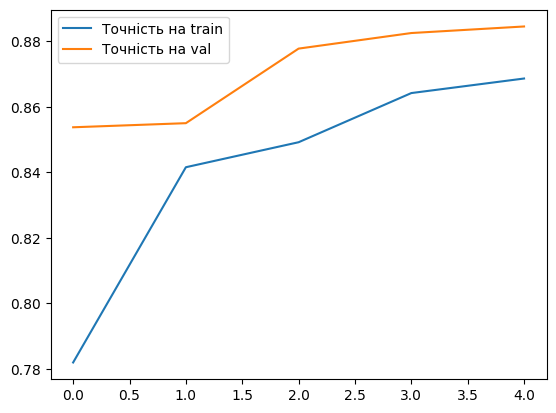

In [ ]:
# 7. Графіки
plt.plot(history.history['accuracy'], label='Точність на train')
plt.plot(history.history['val_accuracy'], label='Точність на val')
plt.legend()
plt.show()


1. MLP (Dense-only) — базова точність ~90%.

2. CNN (власна архітектура) — точність ~93–94%.

3. VGG16 (transfer learning) — показує ще кращу якість (часто 94–96%), бо використовує попередньо навчені фільтри, які добре узагальнюють візуальні ознаки.

4. Після fine-tuning останніх блоків точність зростає ще на 1–2%.